A one song example of Transcription using NMF.

Find more details about the principle of the method in [1], and about the transcription algorithm (by thresholding) in [2].

References:

[1] Smaragdis, P., and Judith C. B.. "Non-negative matrix factorization for polyphonic music transcription." 2003 IEEE Workshop on Applications of Signal Processing to Audio and Acoustics (IEEE Cat. No. 03TH8684). IEEE, 2003.

[2] Marmoret, A., Bertin, N., & Cohen, J. (2019). Multi-Channel Automatic Music Transcription Using Tensor Algebra. arXiv preprint arXiv:2107.11250.

In [1]:
import nmf_audio_benchmark.dataloaders.music.transcription_dataloader as tr_dl
import nmf_audio_benchmark.tasks.music.transcription as tr
import nmf_audio_benchmark.algorithms.nn_fac_algos as nn_fac_algos
from nmf_audio_benchmark.utils.common_plot import plot_me_this_spectrogram

In [2]:

# Path to the dataset
datapath = '/home/a23marmo/datasets/MAPS'

# Dataset class. The object will be initialized in the step function.
dataset_object = tr_dl.MAPSDataloader
dataset = dataset_object(datapath=datapath, feature = "stft", subfolder="ENSTDkCl")
# Instanciate the NMF object
nmf = nn_fac_algos.nn_fac_NMF(10, beta=1, init = "harmonic", nmf_type="unconstrained", normalize=[True, False])

track_id, spectrogram, annotations = dataset[0]

/home/a23marmo/Desktop/Projects/Save git internal/Code/nmf_audio_benchmark/nmf_audio_benchmark/algorithms/nn_fac_algos.py:70: UserWarning: Harmonic initialization is set. Rank is set to 88.
  warnings.warn("Harmonic initialization is set. Rank is set to 88.")


In [3]:
print("Computing NMF...")
# Compute NMF
W, H = nmf.run(data=spectrogram, feature_object = dataset.feature_object) # the feature object is useless if the init is not set to "harmonic"

print("NMF done")

Computing NMF...
NMF done


Error in the 6-th note-atom of the codebook: The pitch is anormally low
Error in the 7-th note-atom of the codebook: This spectrogram is irrelevant
Error in the 8-th note-atom of the codebook: This spectrogram is irrelevant
Error in the 12-th note-atom of the codebook: The pitch is anormally low
Error in the 18-th note-atom of the codebook: The pitch is anormally low
Error in the 26-th note-atom of the codebook: The pitch is anormally low
Error in the 32-th note-atom of the codebook: The pitch is anormally low
W to notes: [78, 85, 64, 74, 90, 94, None, None, None, 61, 37, 68, None, 71, 36, 77, 62, 41, None, 89, 45, 41, 41, 40, 48, 47, None, 35, 48, 39, 51, 43, None, 54, 52, 62, 45, 51, 39, 56, 53, 55, 52, 44, 45, 46, 45, 47, 61, 50, 63, 53, 53, 54, 55, 56, 56, 58, 58, 60, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 72, 74, 75, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88]


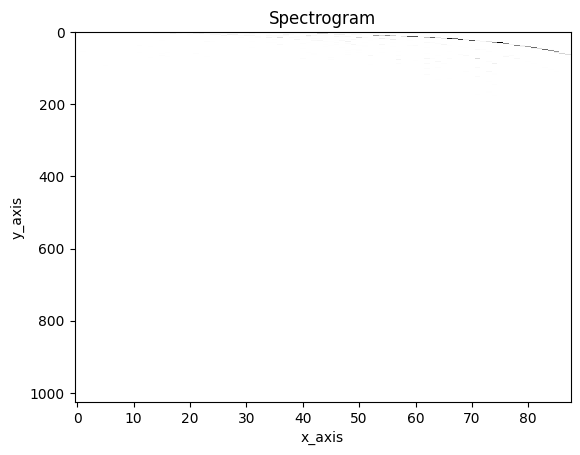

In [4]:
# Converting W to notes, by looking 
W_notes = tr.W_to_notes(W=W, feature_object=dataset.feature_object, verbose = True)

print(f"W to notes: {W_notes}")
plot_me_this_spectrogram(W)

The 6-th note in the codebook is incorrect. Skipping it.
The 7-th note in the codebook is incorrect. Skipping it.
The 8-th note in the codebook is incorrect. Skipping it.
The 12-th note in the codebook is incorrect. Skipping it.
The 18-th note in the codebook is incorrect. Skipping it.
The 26-th note in the codebook is incorrect. Skipping it.
The 32-th note in the codebook is incorrect. Skipping it.
144 notes are estimated, they are 120 notes in the annotations


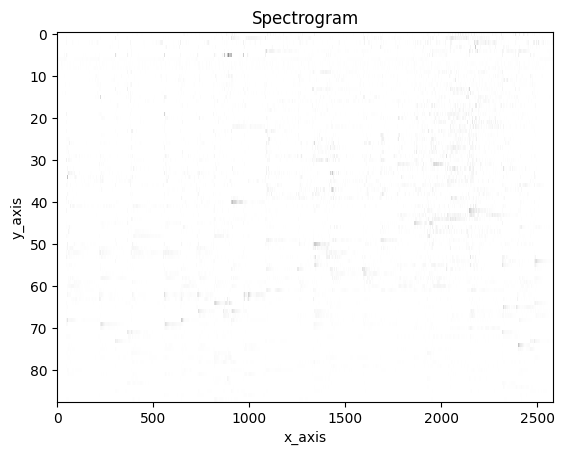

In [5]:
# Compute the activations based on the H matrix
activations = tr.H_to_activations(W_notes=W_notes, H=H, feature_object=dataset.feature_object, threshold=0.01, 
                                  H_normalization=True,adaptative_threshold=False, verbose = True)

print(f"{len(activations)} notes are estimated, they are {len(annotations)} notes in the annotations")
plot_me_this_spectrogram(H)

In [6]:
# Compute metrics based on this transcription
f_mes, accuracy = tr.compute_scores(activations, annotations, time_tolerance=0.05)
print(f"F measure: {f_mes}, accuracy: {accuracy}")

F measure: 0.21969696969696972, accuracy: 0.12340425531914893
